<a href="https://colab.research.google.com/github/MartinNde/MartinN_1/blob/main/Deep_Learning_%26_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
# import libraries
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from zipfile import ZipFile

from sklearn import metrics

# set random seeds to get reproducible results
import os
seed = 100
os.environ['PYTHONHASHSEED']=str(seed) 
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow) 

#Load and analyse data set 

In [8]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# load the data set
# As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
df_train = pd.read_csv('/content/sample_data/Deep learning optim/train.csv')

# summarise the details
print(f'Number of entries: {len(df)}')
df_train.head()
     

Number of entries: 668


,id,A1,A2,A3,A4,A5,A6,A7,A8,class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      668 non-null    int64  
 1   A1      668 non-null    int64  
 2   A2      668 non-null    int64  
 3   A3      668 non-null    int64  
 4   A4      668 non-null    int64  
 5   A5      668 non-null    int64  
 6   A6      668 non-null    float64
 7   A7      668 non-null    float64
 8   A8      668 non-null    int64  
 9   class   668 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 52.3 KB


In [21]:
df_train.describe()

,id,A1,A2,A3,A4,A5,A6,A7,A8,class
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,334.500000,3.812874,120.405689,68.748503,20.567365,79.654192,31.860180,0.477329,33.091317,0.345808
std,192.979273,3.365672,32.291473,19.526392,16.020600,115.827750,7.827111,0.341398,11.711386,0.475988
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,167.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238750,24.000000,0.000000
50%,334.500000,3.000000,116.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,501.250000,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.641250,40.000000,1.000000
max,668.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='class', ylabel='count'>

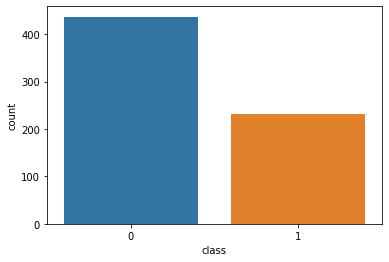

In [22]:
# Summarise class details
sns.countplot(x=df_train['class'])
     


Extracting labels and features

In [24]:
# extract labels
y = df_train['class']

print(y.value_counts())

0    437
1    231
Name: class, dtype: int64


In [25]:
# remove unnecessary columns
X = df.drop(['id', 'class'], axis=1)

print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      668 non-null    int64  
 1   A2      668 non-null    int64  
 2   A3      668 non-null    int64  
 3   A4      668 non-null    int64  
 4   A5      668 non-null    int64  
 5   A6      668 non-null    float64
 6   A7      668 non-null    float64
 7   A8      668 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 41.9 KB
None


,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [26]:
# create LabelEncoder for labels 
le = LabelEncoder()
le.fit(y)
     


LabelEncoder()

In [27]:
# Convert labels into numeric values
y = le.transform(y)

y = pd.Series(y)
print(y.value_counts())

0    437
1    231
dtype: int64


M1 
Model using 8 features and 2 hiden layers

Let's select the first 8 features for this model

In [28]:
X1 = X.iloc[:, 0:8]
X1.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Split Data

In [29]:
# split data to train and validation sets
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train1)}')
print(f'validation data set size: {len(X_val1)}')

training data set size: 467
validation data set size: 201


Build a Model

In [30]:
# define the keras model
model1 = keras.Sequential()
model1.add(layers.Dense(12, input_dim=8, activation='relu'))
model1.add(layers.Dense(8, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [31]:
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
# train model
model1.fit(X_train1, y_train1, batch_size=50, epochs=60, validation_data=(X_val1, y_val1))
     


Epoch 1/60
10/10 [==============================] - 3s 48ms/step - loss: 10.3384 - accuracy: 0.6531 - val_loss: 7.2608 - val_accuracy: 0.6617
Epoch 2/60
10/10 [==============================] - 0s 9ms/step - loss: 7.4265 - accuracy: 0.6317 - val_loss: 5.1038 - val_accuracy: 0.5771
Epoch 3/60
10/10 [==============================] - 0s 10ms/step - loss: 5.7662 - accuracy: 0.5054 - val_loss: 4.0478 - val_accuracy: 0.5622
Epoch 4/60
10/10 [==============================] - 0s 9ms/step - loss: 4.7811 - accuracy: 0.4818 - val_loss: 3.2971 - val_accuracy: 0.5224
Epoch 5/60
10/10 [==============================] - 0s 11ms/step - loss: 3.9519 - accuracy: 0.4604 - val_loss: 2.6234 - val_accuracy: 0.5124
Epoch 6/60
10/10 [==============================] - 0s 9ms/step - loss: 3.2295 - accuracy: 0.5225 - val_loss: 2.0913 - val_accuracy: 0.5423
Epoch 7/60
10/10 [==============================] - 0s 10ms/step - loss: 2.7141 - accuracy: 0.5418 - val_loss: 1.6681 - val_accuracy: 0.5323
Epoch 8/60
10/1

Validate Model

In [33]:
# get model predictions
y_pred1 = model1.predict(X_val1)
print(y_pred1[:10])

7/7 [==============================] - 0s 5ms/step
[[0.14725181]
 [0.95169353]
 [0.14971629]
 [0.3552531 ]
 [0.37571788]
 [0.02387579]
 [0.47169825]
 [0.11509489]
 [0.25395402]
 [0.10381728]]


In [34]:
# convert to categorical predictions
y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in y_pred1]
print(y_pred_categorical1[:10])
     

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [35]:
# measure accuracy
accuracy = metrics.accuracy_score(y_val1, y_pred_categorical1)
print(f'Accuracy: {accuracy}')
     

Accuracy: 0.7064676616915423


Test Predictions

In [37]:
df_test = pd.read_csv('/content/sample_data/Deep learning optim/test.csv')

# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [38]:
X_test1 = X_test.iloc[:, 0:8]
X_test1.head()
     


,A1,A2,A3,A4,A5,A6,A7,A8
0,6,98,58,33,190,34.0,0.430,43
1,9,154,78,30,100,30.9,0.164,45
2,6,165,68,26,168,33.6,0.631,49
3,1,99,58,10,0,25.4,0.551,21
4,10,68,106,23,49,35.5,0.285,47


In [39]:
test_pred = model1.predict(X_test1)
print(test_pred)

test_pred_categorical = [1 if pred > 0.5 else 0 for pred in test_pred]
print(test_pred_categorical)

test_pred_encoded = le.inverse_transform(test_pred_categorical)
print(test_pred_encoded)
     

4/4 [==============================] - 0s 4ms/step
[[0.829433  ]
 [0.3793193 ]
 [0.47066936]
 [0.3736573 ]
 [0.01091327]
 [0.03428324]
 [0.04270543]
 [0.88625455]
 [0.4479746 ]
 [0.2333772 ]
 [0.5629207 ]
 [0.56320316]
 [0.21177492]
 [0.555544  ]
 [0.07426789]
 [0.30744937]
 [0.02372673]
 [0.43929508]
 [0.58493   ]
 [0.4794689 ]
 [0.5943381 ]
 [0.6156294 ]
 [0.22762671]
 [0.19727933]
 [0.2271787 ]
 [0.6358628 ]
 [0.27899948]
 [0.8893153 ]
 [0.51133126]
 [0.48560727]
 [0.191383  ]
 [0.30510154]
 [0.3701251 ]
 [0.28944406]
 [0.41088393]
 [0.15501861]
 [0.2656454 ]
 [0.08820346]
 [0.31642267]
 [0.17054103]
 [0.6071146 ]
 [0.23891953]
 [0.30477408]
 [0.28392506]
 [0.53441274]
 [0.54873604]
 [0.19549747]
 [0.71205527]
 [0.5463616 ]
 [0.1545298 ]
 [0.47787943]
 [0.11141793]
 [0.07071411]
 [0.29665723]
 [0.33525836]
 [0.3493229 ]
 [0.07779095]
 [0.195673  ]
 [0.30194125]
 [0.39078116]
 [0.67340565]
 [0.3571123 ]
 [0.23624612]
 [0.293936  ]
 [0.37148416]
 [0.46624625]
 [0.13151214]
 [0.2924811

#M2

Building a more complex module

In [40]:
# clear session
keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow) 

In [43]:
X.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Split Data

In [44]:
# split data to train and validation sets
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train2)}')
print(f'validation data set size: {len(X_val2)}')

training data set size: 467
validation data set size: 201



#Build Model

In [49]:
# define the keras model
model2 = keras.Sequential()
model2.add(layers.Dense(64, input_dim=8, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                576       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [50]:
# compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
model2.fit(X_train2, y_train2, batch_size=50, epochs=60, validation_data=(X_val2, y_val2))

Epoch 1/60
10/10 [==============================] - 1s 29ms/step - loss: 3.5972 - accuracy: 0.4839 - val_loss: 1.8613 - val_accuracy: 0.4776
Epoch 2/60
10/10 [==============================] - 0s 7ms/step - loss: 1.7418 - accuracy: 0.4797 - val_loss: 1.3691 - val_accuracy: 0.6468
Epoch 3/60
10/10 [==============================] - 0s 7ms/step - loss: 1.0266 - accuracy: 0.5525 - val_loss: 0.7040 - val_accuracy: 0.6567
Epoch 4/60
10/10 [==============================] - 0s 8ms/step - loss: 0.7144 - accuracy: 0.6745 - val_loss: 0.6453 - val_accuracy: 0.6517
Epoch 5/60
10/10 [==============================] - 0s 8ms/step - loss: 0.7203 - accuracy: 0.6767 - val_loss: 0.6720 - val_accuracy: 0.6368
Epoch 6/60
10/10 [==============================] - 0s 8ms/step - loss: 0.6866 - accuracy: 0.6724 - val_loss: 0.7272 - val_accuracy: 0.6468
Epoch 7/60
10/10 [==============================] - 0s 8ms/step - loss: 0.6431 - accuracy: 0.6959 - val_loss: 0.6398 - val_accuracy: 0.6816
Epoch 8/60
10/10 [=